In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("unibo-powertools-dataset\\unibo-powertools-dataset\\test_result_trial_end_cleaned_v1.0.csv")

In [4]:
# Dataset is already cleaned and filtered for temperature range -10 to 47°C
print(f"Using cleaned dataset: unibo-powertools-dataset\\unibo-powertools-dataset\\test_result_trial_end_cleaned_v1.0.csv")
print(f"Dataset shape: {df.shape}")
print(f"Temperature range: {df['max_temperature'].min():.1f}°C to {df['max_temperature'].max():.1f}°C")
print(f"No missing values: {df.isnull().sum().sum() == 0}")
print(f"No duplicates: {df.duplicated().sum() == 0}")

Using cleaned dataset: unibo-powertools-dataset\unibo-powertools-dataset\test_result_trial_end_cleaned_v1.0.csv
Dataset shape: (405765, 16)
Temperature range: 21.2°C to 47.0°C
No missing values: True
No duplicates: True
No duplicates: True


In [5]:
df.head(2)

,test_name,record_id,time,step_time,line,voltage,current,charging_capacity,discharging_capacity,wh_charging,wh_discharging,temperature,cycle_count,max_temperature,average_tension,SOC
0,000-DM-3.0-4019-S,1146,3.113563,3.047577,17,4.200306,0.148718,2.863550,0.0,10.881516,0.0,26.8295,1,34.4451,3.822657,67.824884
1,000-DM-3.0-4019-S,3088,15.357586,5.066483,26,4.200306,0.149368,2.967387,0.0,11.175892,0.0,26.0049,1,26.8112,3.743266,70.284306


In [6]:
# Calculate and add SOC (State of Charge) to the dataframe
if 'charging_capacity' in df.columns and 'discharging_capacity' in df.columns:
    # Example SOC calculation: (charging_capacity - discharging_capacity) / max(charging_capacity) * 100
    df['SOC'] = (df['charging_capacity'] - df['discharging_capacity']) / df['charging_capacity'].max() * 100
else:
    print('Required columns for SOC calculation not found.')
df.head()

,test_name,record_id,time,step_time,line,voltage,current,charging_capacity,discharging_capacity,wh_charging,wh_discharging,temperature,cycle_count,max_temperature,average_tension,SOC
0,000-DM-3.0-4019-S,1146,3.113563,3.047577,17,4.200306,0.148718,2.863550,0.000000,10.881516,0.000000,26.8295,1,34.4451,3.822657,67.824884
1,000-DM-3.0-4019-S,3088,15.357586,5.066483,26,4.200306,0.149368,2.967387,0.000000,11.175892,0.000000,26.0049,1,26.8112,3.743266,70.284306
2,000-DM-3.0-4019-S,3105,15.610456,0.002778,29,4.162334,-0.500706,2.967387,0.001389,11.175895,0.005783,25.6872,1,25.6903,4.166850,70.251433
3,000-DM-3.0-4019-S,3116,15.610733,0.000278,30,4.048610,-5.000565,2.967387,0.002777,11.175895,0.011413,25.6872,1,25.6872,4.057835,70.218551
4,000-DM-3.0-4019-S,3127,15.613511,0.002778,29,4.155430,-0.500706,2.967387,0.004168,11.175895,0.017192,25.6872,2,25.6872,4.152227,70.185608


In [7]:
# Remove rows where SOC is negative
if 'SOC' in df.columns:
    df = df[df['SOC'] >= 0]
else:
    print('SOC column not found.')
df.head()

,test_name,record_id,time,step_time,line,voltage,current,charging_capacity,discharging_capacity,wh_charging,wh_discharging,temperature,cycle_count,max_temperature,average_tension,SOC
0,000-DM-3.0-4019-S,1146,3.113563,3.047577,17,4.200306,0.148718,2.863550,0.000000,10.881516,0.000000,26.8295,1,34.4451,3.822657,67.824884
1,000-DM-3.0-4019-S,3088,15.357586,5.066483,26,4.200306,0.149368,2.967387,0.000000,11.175892,0.000000,26.0049,1,26.8112,3.743266,70.284306
2,000-DM-3.0-4019-S,3105,15.610456,0.002778,29,4.162334,-0.500706,2.967387,0.001389,11.175895,0.005783,25.6872,1,25.6903,4.166850,70.251433
3,000-DM-3.0-4019-S,3116,15.610733,0.000278,30,4.048610,-5.000565,2.967387,0.002777,11.175895,0.011413,25.6872,1,25.6872,4.057835,70.218551
4,000-DM-3.0-4019-S,3127,15.613511,0.002778,29,4.155430,-0.500706,2.967387,0.004168,11.175895,0.017192,25.6872,2,25.6872,4.152227,70.185608


In [8]:
# Load the dataset
# Filter for temperature range -10 to 47°C
df = df[(df['max_temperature'] >= -10) & (df['max_temperature'] <= 47)]

# Data cleaning: drop missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()

df = df[['max_temperature', 'time', 'SOC', 'voltage', 'current']]

# Save the cleaned dataset with a versioned filename
cleaned_filename = "unibo-powertools-dataset/unibo-powertools-dataset/test_result_trial_end_cleaned_v1.0.csv"
df.to_csv(cleaned_filename, index=False)
print(f"Cleaned dataset saved as: {cleaned_filename}")

Cleaned dataset saved as: unibo-powertools-dataset/unibo-powertools-dataset/test_result_trial_end_cleaned_v1.0.csv


In [9]:
len(df)

405765

In [10]:
min(df['max_temperature']), max(df['max_temperature'])

(21.174, 46.9992)

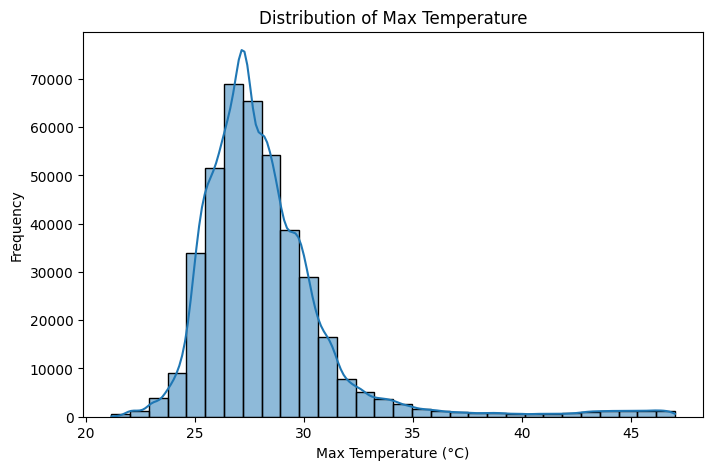

In [11]:
# Plot temperature distribution graph
import seaborn as sns
import matplotlib.pyplot as plt

if 'max_temperature' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['max_temperature'], bins=30, kde=True)
    plt.xlabel('Max Temperature (°C)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Max Temperature')
    plt.show()
else:
    print('max_temperature column not found.')

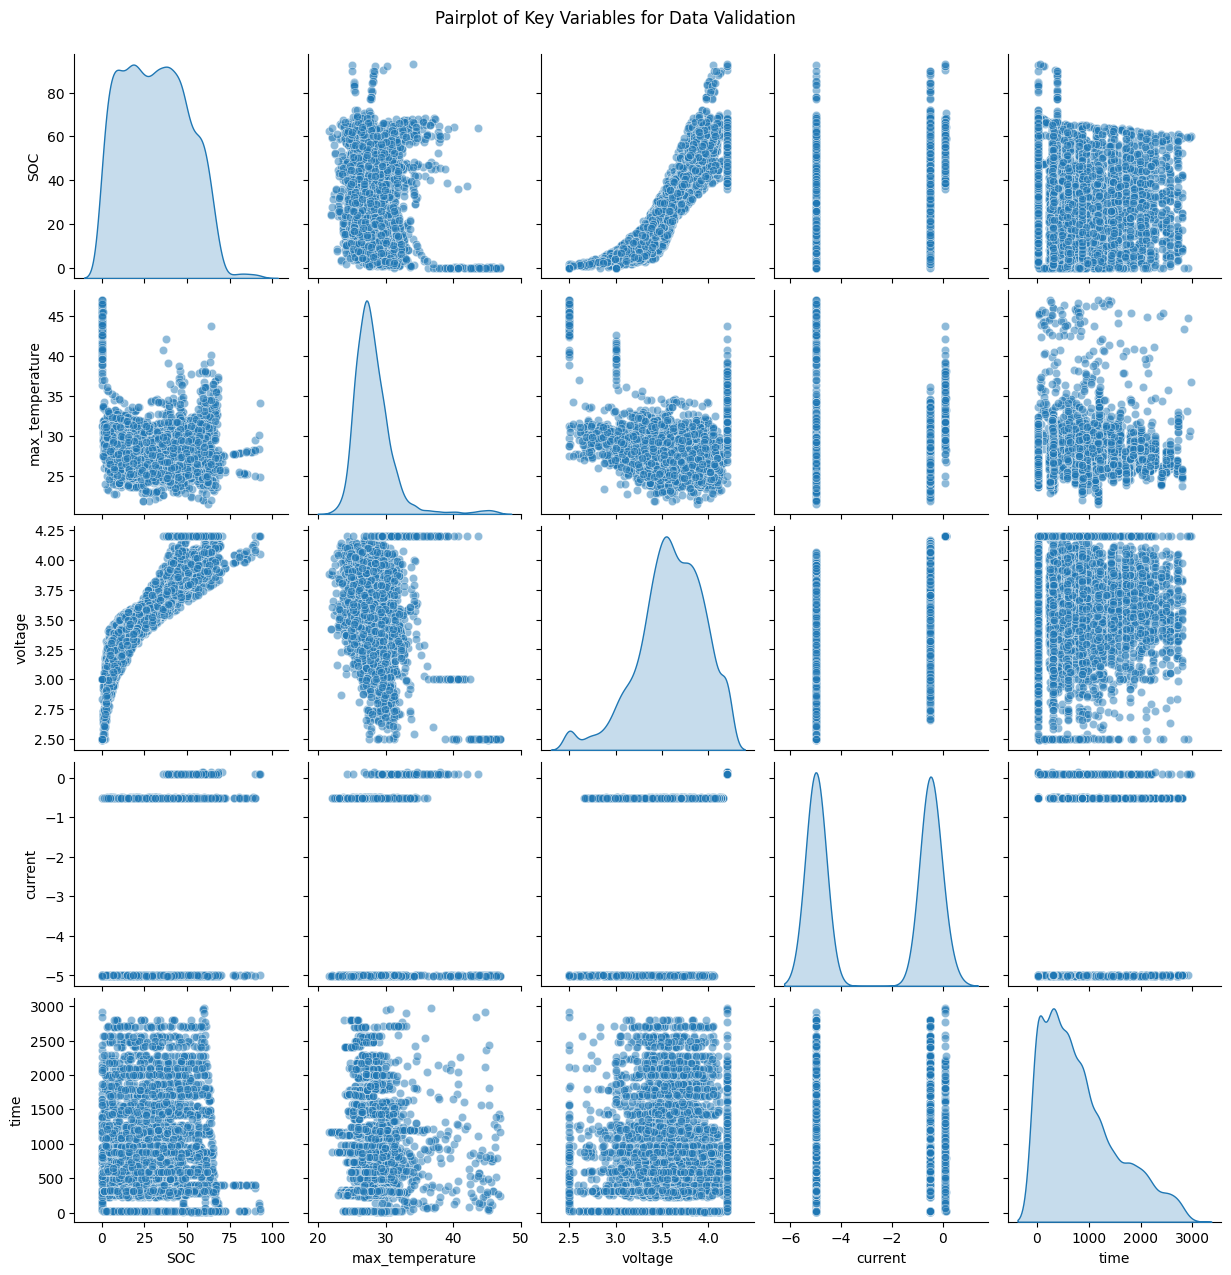

In [12]:
# Pairplot for key variables to validate data quality and relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for pairplot
pairplot_cols = ['SOC', 'max_temperature', 'voltage', 'current', 'time']
available_cols = [col for col in pairplot_cols if col in df.columns]

if len(available_cols) >= 2:
    # Sample 5000 rows for performance if dataset is huge
    sample_df = df[available_cols].sample(n=min(5000, len(df)), random_state=42)
    sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Pairplot of Key Variables for Data Validation', y=1.02)
    plt.show()
else:
    print('Not enough relevant columns for pairplot.')